In [6]:
cd ..

/home/jovyan/DS_02_Final


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import lib.visuals as vs
import numpy as np

%matplotlib inline

In [8]:
run src/load_data_2.py

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=383)
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=383)


In [9]:
whos DataFrame

Variable              Type         Data/Info
--------------------------------------------
df_gelman             DataFrame          LotFrontage   LotAr<...>[1451 rows x 383 columns]
df_housing_original   DataFrame          LotFrontage  LotAre<...>[1451 rows x 383 columns]
df_standard           DataFrame          LotFrontage   LotAr<...>[1451 rows x 383 columns]
housing_df            DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
listing_df            DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
sale_df               DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df             DataFrame            Id  MSSubClass MS<...>n[1460 rows x 15 columns]


In [11]:
np.random.seed(20)

In [13]:
final_df = df_gelman[['GrLivArea','LotArea','TotalBsmtSF','BsmtFinSF1','GarageArea','YearBuilt','GarageCars_2','Neighborhood_Somerst','YearRemodAdd','BsmtUnfSF']]
sample_df = final_df.sample(5)
sample_df

,GrLivArea,LotArea,TotalBsmtSF,BsmtFinSF1,GarageArea,YearBuilt,GarageCars_2,Neighborhood_Somerst,YearRemodAdd,BsmtUnfSF
Id,,,,,,,,,,
1428,0.126282,0.182881,0.030010,0.357354,-0.047559,-0.429069,-0.566603,-0.123117,-0.844208,0.044590
84,-0.443523,-0.016555,0.096987,-0.706883,0.113209,-0.179499,0.440922,-0.123117,-0.599057,0.356797
20,-0.100625,-0.173389,0.082030,0.333913,-0.040517,-0.212665,-0.566603,-0.123117,-0.476950,0.166769
461,0.450927,-0.118235,-0.010392,0.346659,0.174821,0.622661,0.440922,2.029197,0.584391,0.005658
1233,-0.235125,0.081546,-2.938313,-0.706883,0.113950,-0.146367,0.440922,-0.123117,-0.550177,-1.518735


In [14]:
original_final_df = df_housing_original[['GrLivArea','LotArea','TotalBsmtSF','BsmtFinSF1','GarageArea','YearBuilt','GarageCars_2','Neighborhood_Somerst','YearRemodAdd','BsmtUnfSF']]
original_final_df.mean()

GrLivArea                1514.174363
LotArea                 10507.808408
TotalBsmtSF              1056.310131
BsmtFinSF1                442.274983
GarageArea                472.525155
YearBuilt                1971.092350
GarageCars_2                0.562371
Neighborhood_Somerst        0.057202
YearRemodAdd             1984.760165
BsmtUnfSF                 567.197105
dtype: float64

In [17]:
df_housing_original.iloc[[1428, 84, 20, 461, 1233]]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1438,96.000000,12444,2008,2008,426.0,1336,0,596,1932,1932,...,0,1,0,0,0,0,0,0,0,1
85,70.049958,8530,1995,1996,22.0,0,0,384,384,804,...,0,0,0,1,0,0,0,0,1,0
21,101.000000,14215,2005,2006,380.0,0,0,1158,1158,1158,...,0,1,0,0,0,0,0,0,0,1
463,60.000000,8281,1965,1965,0.0,553,311,0,864,864,...,0,0,0,1,0,0,0,0,1,0
1240,64.000000,9037,2006,2006,32.0,428,0,1048,1476,1484,...,0,0,0,1,0,0,0,0,1,0


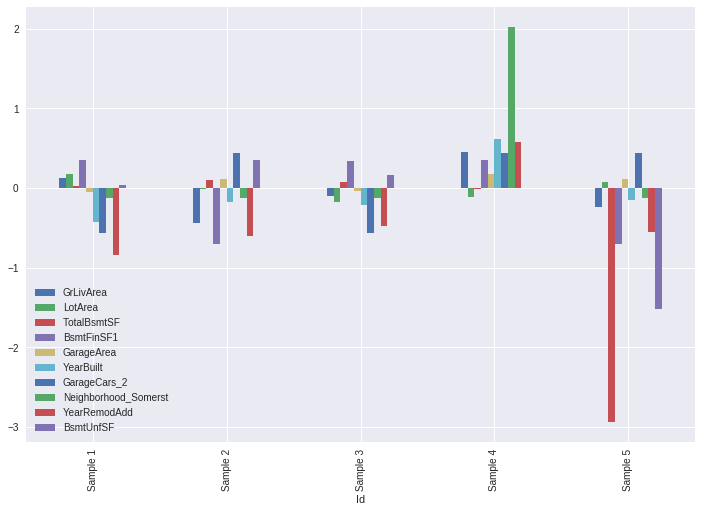

In [18]:
sample_df.plot(kind='bar', figsize=(12,8))
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

# PCA

In [19]:
pca = PCA()
pca.fit(final_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

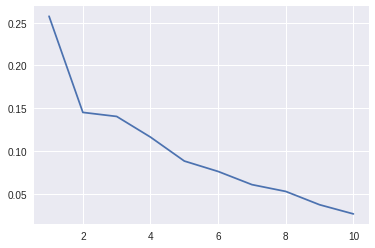

In [22]:
plt.plot( range(1, 11), pca.explained_variance_ratio_)

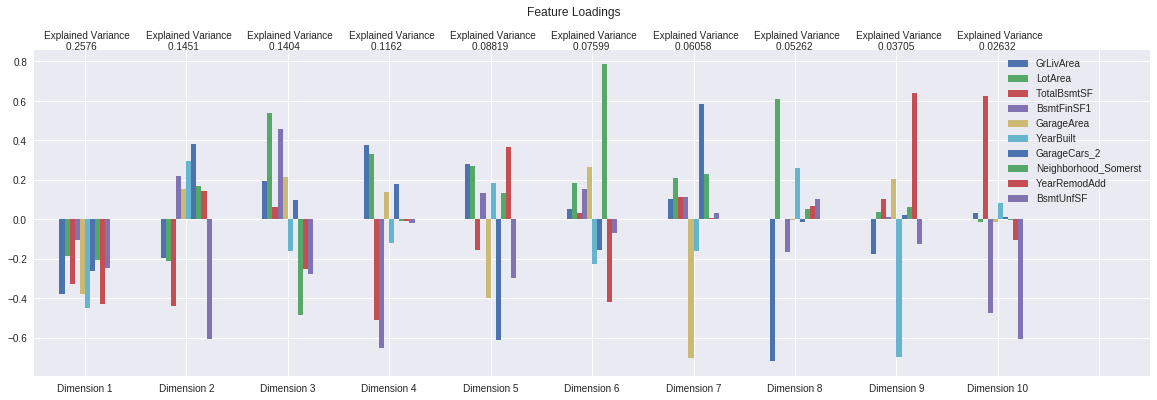

In [24]:
flplot = vs.FeatureLoadingsPlot(final_df, pca, 10)
flplot.display_segments()

Dime

In [25]:
pca_2 = PCA(n_components=2)
pca_2.fit(final_df)
pca_4 = PCA(n_components=4)
pca_4.fit(final_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
housing_pca_2_df = pd.DataFrame(pca_2.transform(final_df), 
                               columns=['Dimension 1', 'Dimension 2'],
                               index=final_df.index)
housing_pca_4_df = pd.DataFrame(pca_4.transform(final_df), 
                               columns=['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'],
                               index=final_df.index)
sample_pca_2_df = pd.DataFrame(pca_2.transform(sample_df), 
                             columns=['Dimension 1', 'Dimension 2'],
                             index=sample_df.index)
sample_pca_4_df = pd.DataFrame(pca_4.transform(sample_df), 
                             columns=['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'],
                             index=sample_df.index)

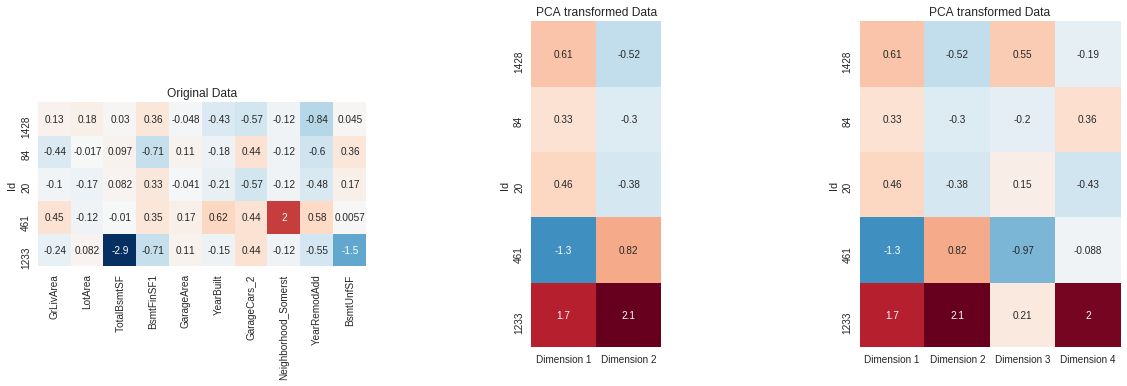

In [30]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(131)
plt.title("Original Data")
sns.heatmap(sample_df, annot=True, cbar=False, square=True)
fig.add_subplot(132)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_2_df, annot=True, cbar=False, square=True)
fig.add_subplot(133)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_4_df, annot=True, cbar=False, square=True)

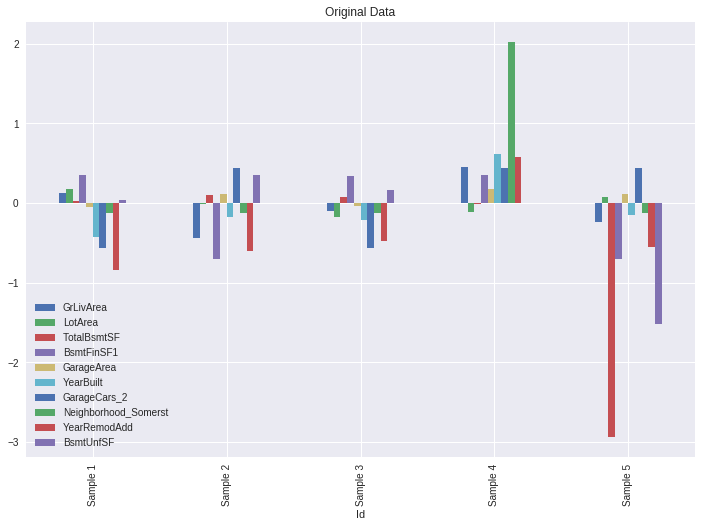

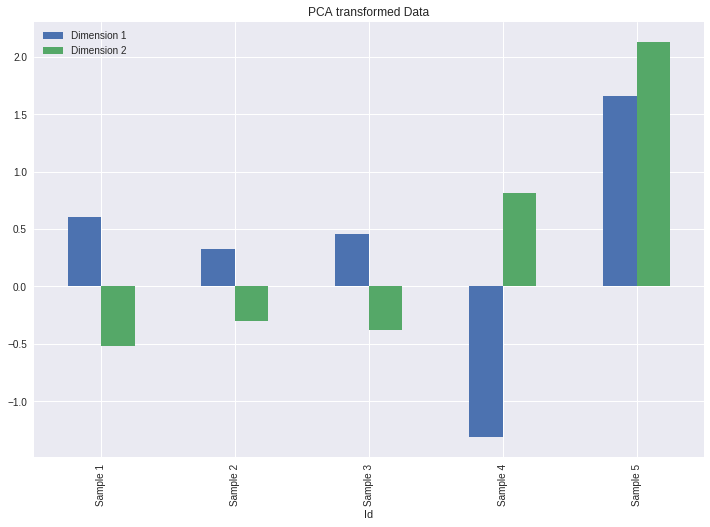

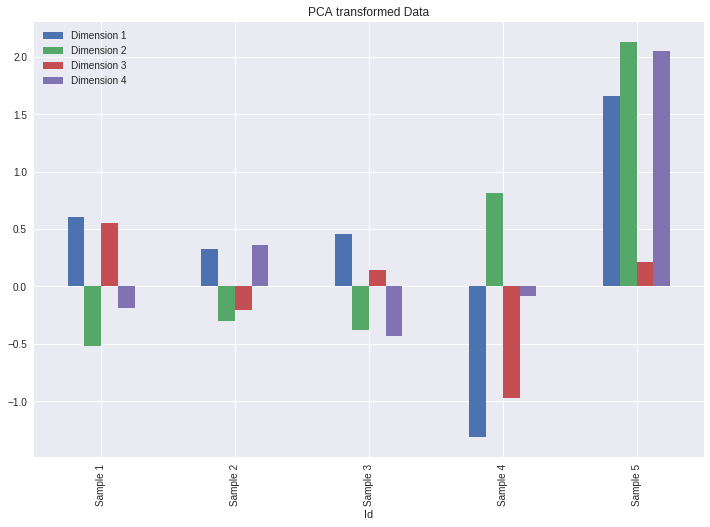

In [28]:
sample_df.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_2_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_4_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

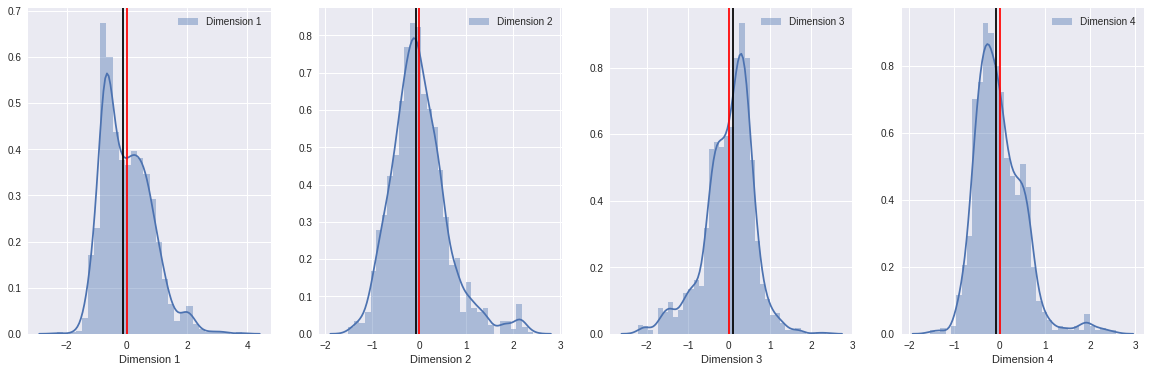

In [33]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(housing_pca_4_df.columns):
    fig.add_subplot(141+i)
    sns.distplot(housing_pca_4_df[col], label=col)
    plt.axvline(housing_pca_4_df[col].mean(), c='red')
    plt.axvline(housing_pca_4_df[col].median(), c='black')
    plt.legend()

# Clustering

 33%|███▎      | 1/3 [00:27<00:54, 27.38s/it]

For n_clusters = 2 the silhouette score is 0.4393594736159757.


 67%|██████▋   | 2/3 [00:31<00:15, 15.71s/it]

For n_clusters = 3 the silhouette score is 0.47349239056441034.


100%|██████████| 3/3 [00:35<00:00, 11.78s/it]

For n_clusters = 4 the silhouette score is 0.3820002713736468.


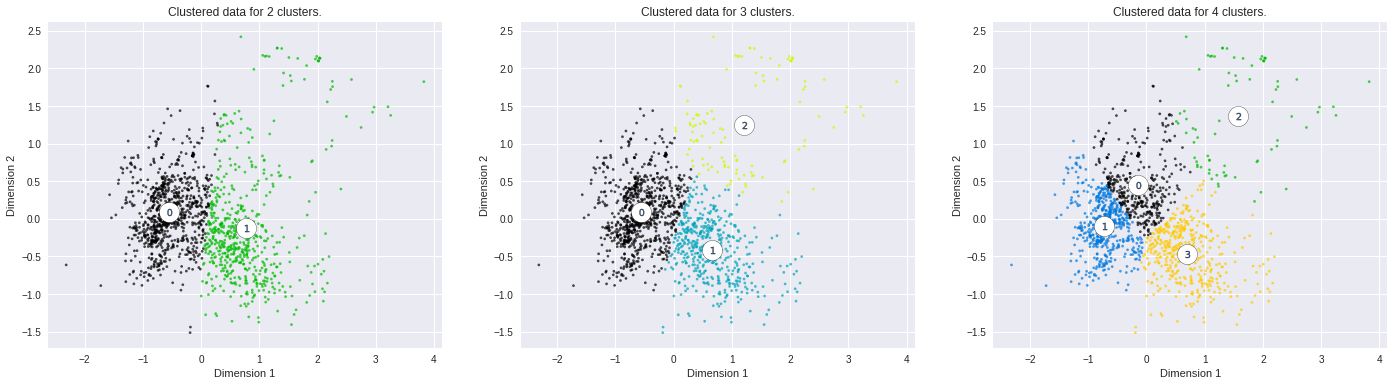

In [34]:
pca_2_clusters = vs.Clusters(housing_pca_2_df, range(2,5))
pca_2_clusters.cluster_plots()

 25%|██▌       | 1/4 [00:02<00:06,  2.06s/it]

For n_clusters = 2 the silhouette score is 0.28605785330740297.


 50%|█████     | 2/4 [00:04<00:04,  2.26s/it]

For n_clusters = 3 the silhouette score is 0.3079519117107635.


 75%|███████▌  | 3/4 [00:06<00:02,  2.25s/it]

For n_clusters = 4 the silhouette score is 0.30982490822079195.


100%|██████████| 4/4 [00:09<00:00,  2.32s/it]

For n_clusters = 5 the silhouette score is 0.30088125732680904.


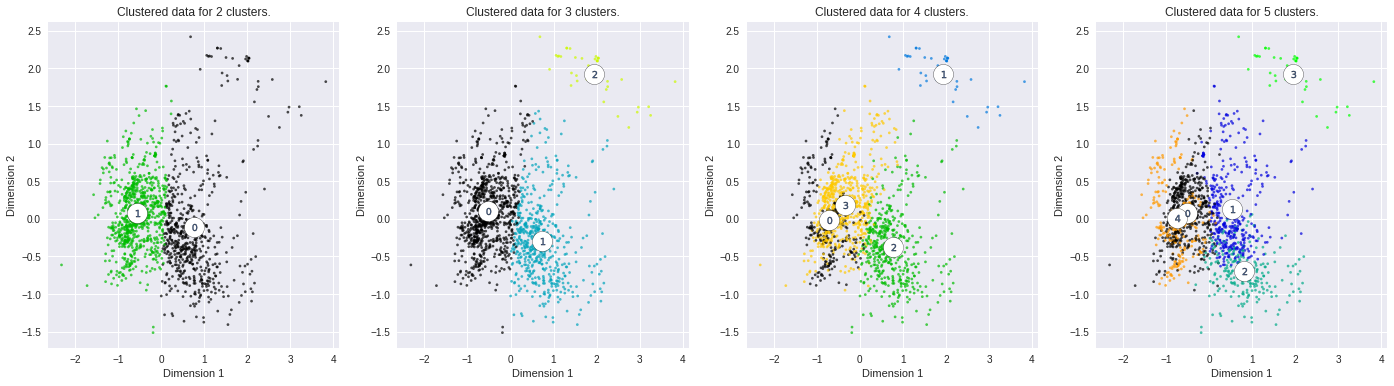

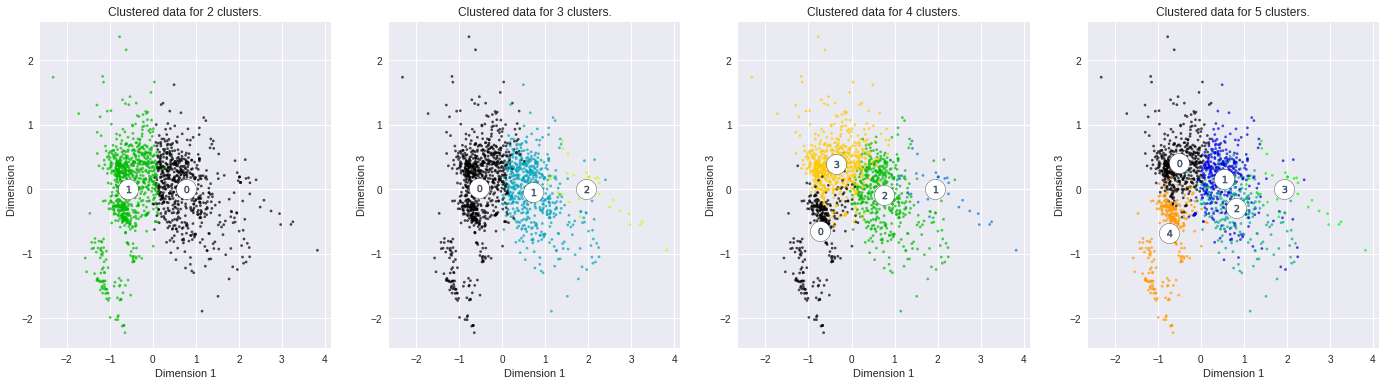

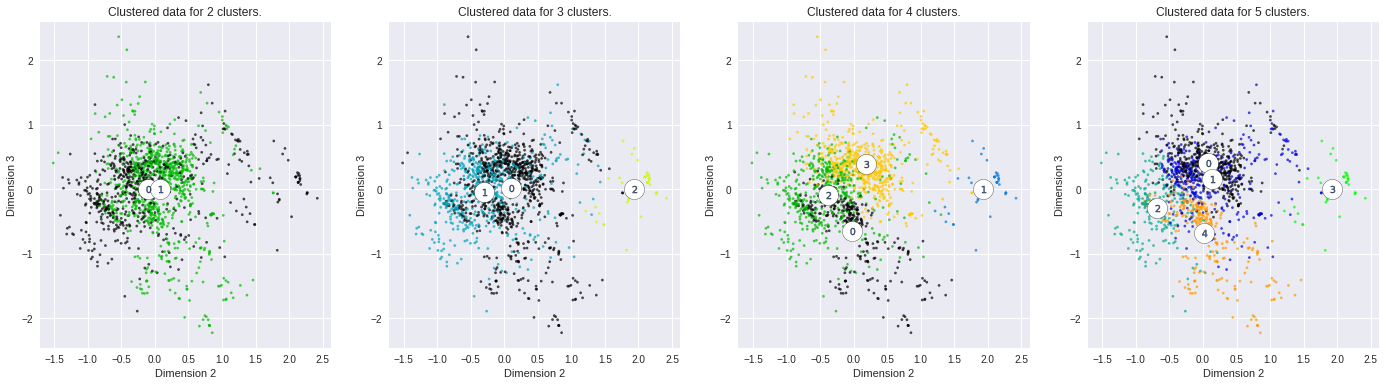

In [35]:
pca_4_clusters = vs.Clusters(housing_pca_4_df, range(2,6))
pca_4_clusters.cluster_plots(1,2)
pca_4_clusters.cluster_plots(1,3)
pca_4_clusters.cluster_plots(2,3)

 50%|█████     | 1/2 [00:01<00:01,  1.93s/it]

For n_clusters = 2 the silhouette score is 0.28605785330740297.


100%|██████████| 2/2 [00:04<00:00,  2.28s/it]

For n_clusters = 3 the silhouette score is 0.30355971744287946.


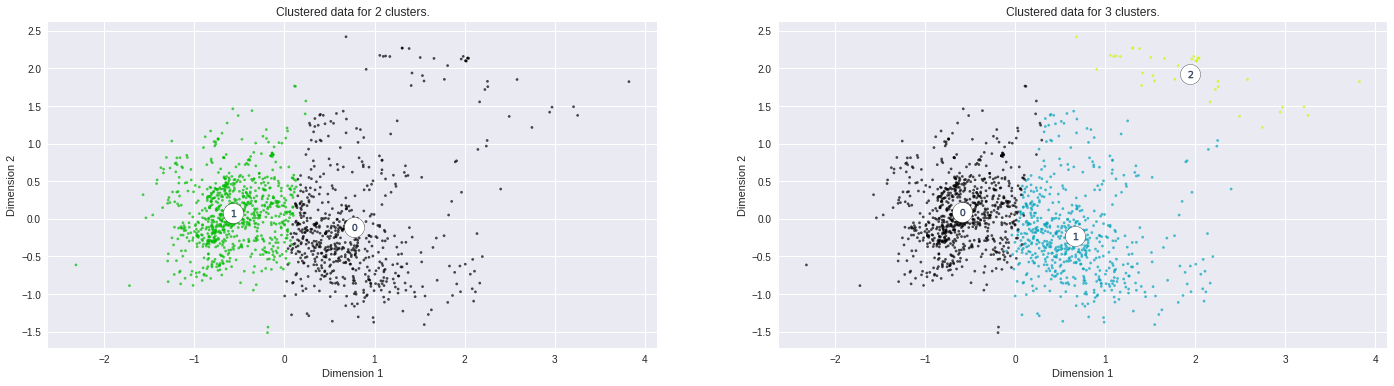

In [36]:
pca_4_clusters = vs.Clusters(customer_pca_4_df, range(2,4))
pca_4_clusters.cluster_plots()

We can see from the Silhouette score that looking at dimensions 1 and 2 with the number of clusters set to 3 gave us the highest score of 0.473.

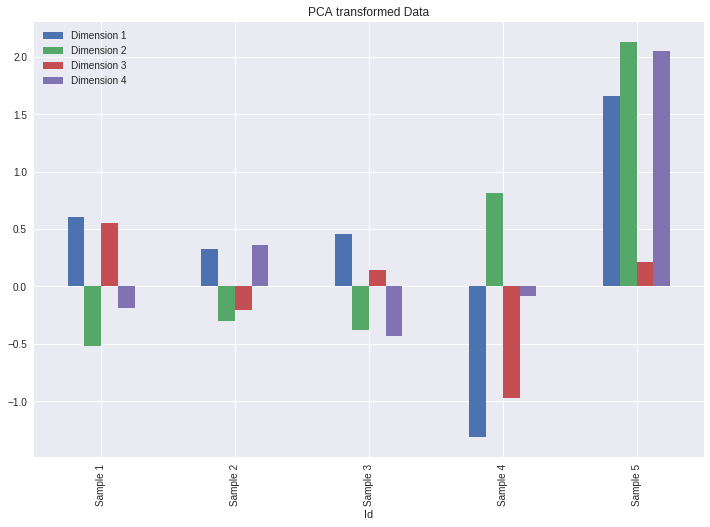

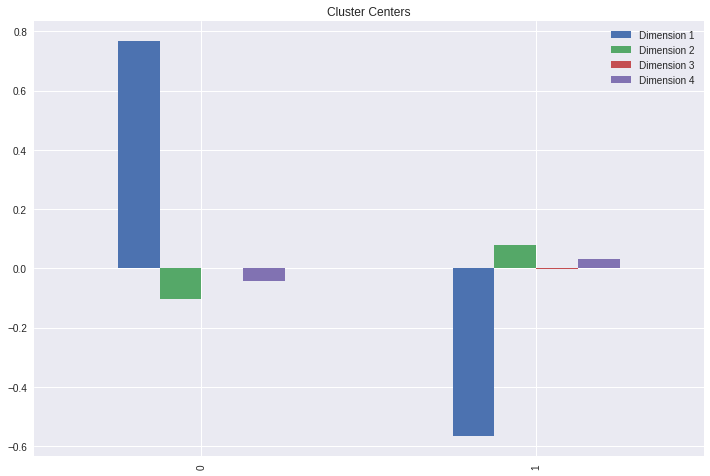

In [37]:
sample_pca_4_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

pca_4_clusters.cluster_centers[2].plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")

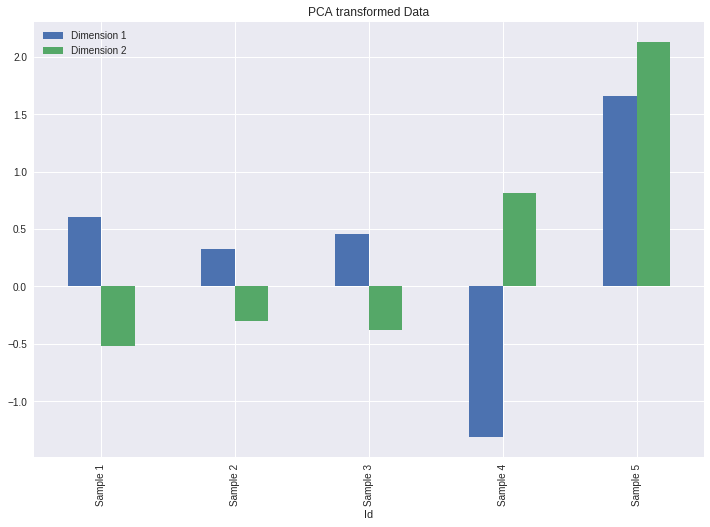

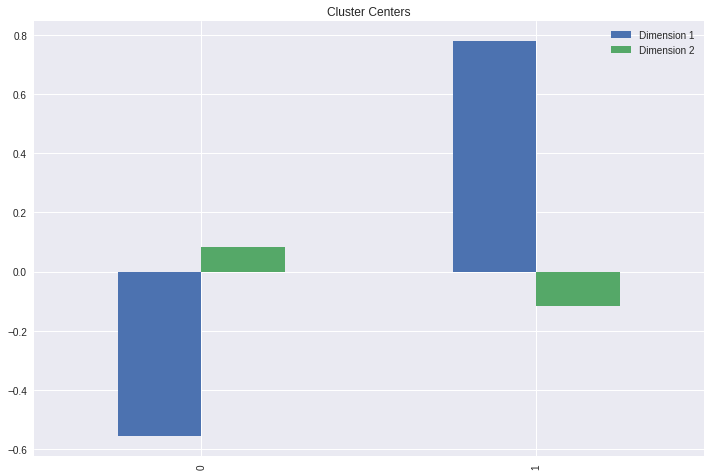

In [38]:
sample_pca_2_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

pca_2_clusters.cluster_centers[2].plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")

In [39]:
inv_transform_clusters = pd.DataFrame(pca_2.inverse_transform(pca_2_clusters.cluster_centers[2]), columns=final_df.columns)

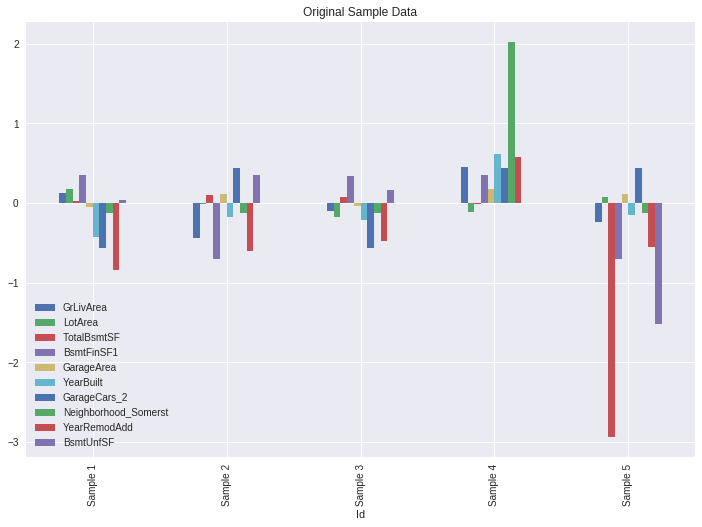

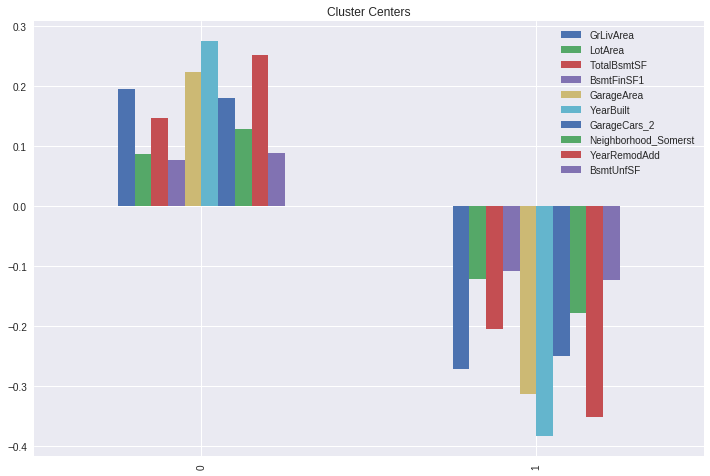

In [40]:
sample_df.plot(kind='bar', figsize=(12,8))
plt.title("Original Sample Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

inv_transform_clusters.plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")